# Imports

In [1]:
# Librerias a utilizar
#-------------------------------------------------
# tratamiento de datos 
import pandas as pd
import numpy as np
#-------------------------------------------------
# gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#-------------------------------------------------
# procesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
#-------------------------------------------------
# configuración de warnings
import warnings

# Configuración de matplotlib

In [2]:
# Congirucaciókn de matplotlib
plt.rcParams['image.cmap'] = 'bwr'
plt.rcParams['savefig.bbox'] = 'tight'
style.use('ggplot') or plt.style.use('ggplot')

# Datos

In [3]:
# Datos
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

data = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
data.head(3)

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787


# Representación Gráfica

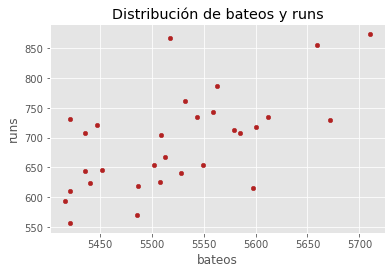

In [4]:
# representación gráfica
fig, ax = plt.subplots(figsize=(6, 3.84))
data.plot(x='bateos', y='runs', c='firebrick', kind='scatter', ax=ax)
ax.set_title('Distribución de bateos y runs');

In [24]:
# correlación líneal entre las dos variables
corr_test = pearsonr(x=data['bateos'], y=data['runs'])
print('coeficiente de correlación de pearson: ', corr_test[0])
print('P-value: ', corr_test[1])


coeficiente de correlación de pearson:  0.6106270467206688
P-value:  0.0003388351359791963


El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (r = 0.61) y significativa (p-value = 0.000339). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el número de runs en función del número de bateos del equipo.


# Ajuste del modelo

In [48]:
# se ajusta el modelo empleando como variable respuesta runs y como prredictor bateos
# División de los datos en train y test
X = data['bateos']
y = data['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [49]:
# informaciónd el modelo
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.name, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X.values.reshape(-1, 1), y))

Intercept: [-2367.7028413]
Coeficiente: [('b', 0.5528713534479736)]
Coeficiente de determinación R^2: 0.3586119899498744


Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.

In [54]:
# Evualuación error del modelo
predicciones = modelo.predict(X = X_test)
print(predicciones[:3,])

rmse = mean_squared_error(
    y_true = y_test,
    y_pred = predicciones,
    squared = False
)

print()
print(f'El error (rmse) de test es: {rmse}')

[[643.78742093]
 [720.0836677 ]
 [690.78148597]]

El error (rmse) de test es: 59.336716083360486


# Modelando con Statsmodels

In [62]:
# División de los datos en train y test
X = data['bateos']
y = data['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
#----------------------------------------------------------------

In [76]:
# Creación del modelo utilizando matrices como en scikitlearn
# # A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Mon, 05 Jul 2021   Prob (F-statistic):            0.00906
Time:                        12:37:19   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2367.7028   1066.357     -2.220      0.0

# Intervalos de confianza de los coeficientes

In [68]:
# intervalos de confianza para los coeficientes del modelo
modelo.conf_int(alpha=0.05)


array([[-4.57919205e+03, -1.56213633e+02],
       [ 1.52244180e-01,  9.53498527e-01]])

# Predicciones

Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular las predicciones de dos formas:

### .predict(): devuelve únicamente el valor de las predicciones.
### .get_prediction().summary_frame(): devuelve, además de las predicciones, los intervalos de confianza asociados.

# Representación gráfica del modelo

### Además de la línea de mínimos cuadrados, es recomendable incluir los límites superior e inferior del intervalo de confianza. 
### Esto permite identificar la región en la que, según el modelo generado y para un determinado nivel de confianza, 
### se encuentra el valor promedio de la variable respuesta.

In [73]:
# predicciones con intervalo de confianza del 95%
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:,1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')
predicciones.head(4)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,x,y
4,629.412766,23.713237,580.234522,678.591009,477.670673,781.154858,5421.0,610
17,629.412766,23.713237,580.234522,678.591009,477.670673,781.154858,5421.0,556
10,629.412766,23.713237,580.234522,678.591009,477.670673,781.154858,5421.0,731
5,637.705836,21.455690,593.209459,682.202213,487.415815,787.995858,5436.0,707


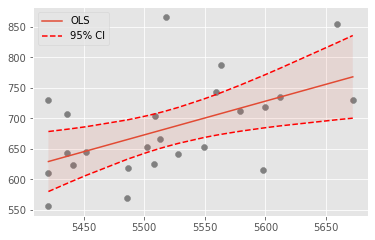

In [75]:
# grafica del modelo 
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();